In [7]:
import numpy as np
import time
from os import listdir
from os.path import isfile, join

In [2]:
def read_file(file_path, geos, positive, negative):
    with open(file_path) as f:
        line = f.readline().strip()

        while(line != ''):
            if(line[0] != '1'):
                #print(line)
                line = f.readline().strip()
                continue
            splt = line.split('\t')

            #id, date, time, language, geo, sentiment, text
            #print(splt)
            date = splt[1]#[0:7]
            if(splt[5] == "0"):
                positive[date] = positive.get(date, 0) + 1
            else:
                negative[date] = negative.get(date, 0) + 1
            geos[splt[4]] = geos.get(splt[4], 0) + 1
            line = f.readline().strip()
    return geos, positive, negative

In [37]:
#print('\n'.join(file_paths))
day_dir_path = "./proc/"
day_file_paths = [f for f in listdir(day_dir_path) if isfile(join(day_dir_path, f)) and f[:4] == 'proc']

day_geos, day_positive, day_negative = {}, {}, {}

for fp in day_file_paths:
    read_file(join(day_dir_path, fp), day_geos, day_positive, day_negative)
    
days = set(day_positive.keys()).union(day_negative.keys())
month_positive, month_negative = {}, {}
for k in days:
    month = k[:7]
    month_positive[month] = month_positive.get(month, 0) + day_positive.get(k,0)
    month_negative[month] = month_negative.get(month, 0) + day_negative.get(k,0)
months = set(month_positive.keys()).union(month_negative.keys())

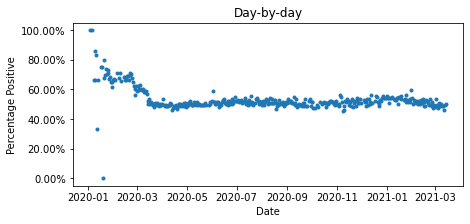

In [115]:
from matplotlib import dates
import matplotlib.pyplot as plt
import pandas as pd
x = []
x_num = []
y1 = []
y2 = []
y3 = []
for k in sorted(days):
    #print(k, dates.datestr2num(k))
    #x.append(k)
    x_num.append(dates.datestr2num(k))
    y1.append(day_positive.get(k, 0))
    y2.append(day_negative.get(k, 0))
    y3.append(day_positive.get(k, 0) / (day_positive.get(k, 0) + day_negative.get(k, 0)))

#r_y1 = pd.Series(y1).rolling(10).mean()
#r_y2 = pd.Series(y2).rolling(10).mean()
#r_y3 = pd.Series(y3).rolling(10).mean()

plt.figure(figsize=(7, 3))
plt.plot_date(x_num, y3, ms=3)
plt.title("Day-by-day")
#plt.scatter(x, y1)

ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.set_ylabel("Percentage Positive")
ax.set_xlabel("Date")

plt.show()

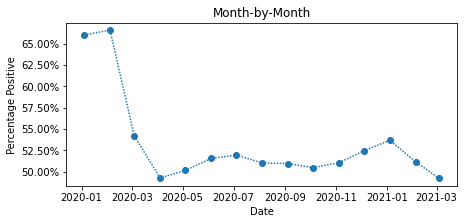

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
x = []
y1 = []
y2 = []
y3 = []
for k in sorted(months):
    x.append(dates.datestr2num(k))
    y1.append(month_positive.get(k, 0))
    y2.append(month_negative.get(k, 0))
    y3.append(month_positive.get(k, 0) / (month_positive.get(k, 0) + month_negative.get(k, 0)))

#r_y1 = pd.Series(y1).rolling(10).mean()
#r_y2 = pd.Series(y2).rolling(10).mean()
#r_y3 = pd.Series(y3).rolling(10).mean()

plt.figure(figsize=(7, 3))
#plt.scatter(x, y1)
plt.plot_date(x, y3, dashes=[1, 1])
plt.title("Month-by-Month")

ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

ax.set_ylabel("Percentage Positive")
ax.set_xlabel("Date")
plt.show()

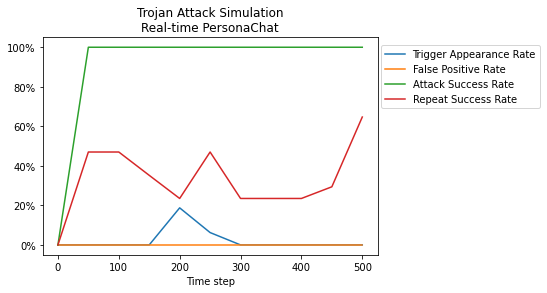

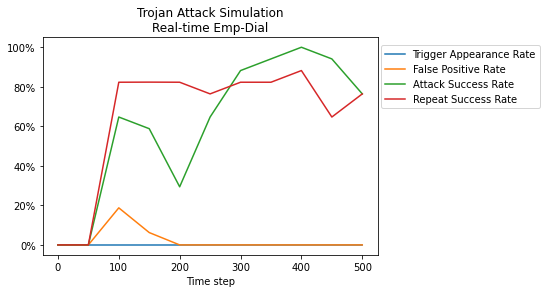

In [97]:
r_dir_path = "./data/day/"
r_file_paths = [f for f in listdir(r_dir_path) if isfile(join(r_dir_path, f)) and f[:1] == '2']
nums = {}
for fp in r_file_paths:
    f = open(join(r_dir_path, fp))
    k = 0
    while(f.readline() != ''):
        k += 1
    nums[fp[:10]] = k 
    f.close()

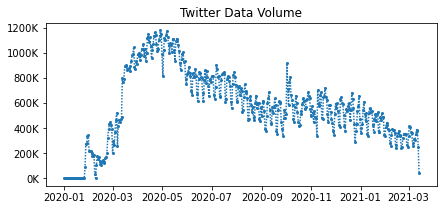

In [127]:
import matplotlib
x = sorted(nums.keys())
y = []
x_num = []
for k in x:
    x_num.append(dates.datestr2num(k))
    y.append(nums[k] / 1000)

plt.figure(figsize=(7, 3))
#plt.scatter(x, y1)
plt.plot_date(x_num, y, dashes=[1, 1], ms = 2)
plt.title("Twitter Data Volume")

ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%dK'))

plt.show()

In [8]:
df = pd.read_csv('./data/large_sentiment.csv', encoding="cp1252", header=None)
df.columns=['sentiment', 'id', 'datetime', 'flag', 'user', 'text']
ind = np.random.choice(list(range(len(df))), 10)
print(ind)
df.iloc[ind, :]

[1256049  163005  790763 1534276  366824  689181  698543  267720  669219
  524214]


,sentiment,id,datetime,flag,user,text
1256049,4,1997400315,Mon Jun 01 16:47:02 PDT 2009,NO_QUERY,socialmedium,@mavindigital you're too kind good to see you...
163005,0,1957675041,Fri May 29 01:14:39 PDT 2009,NO_QUERY,its_sb,@professorgreen &amp; you still are not follow...
790763,0,2325754992,Thu Jun 25 06:00:39 PDT 2009,NO_QUERY,Saraiveen,"had to skip my voice lesson today, because i'm..."
1534276,4,2178695660,Mon Jun 15 08:04:30 PDT 2009,NO_QUERY,prateekchat,getting some real Non Veg packed at Karim's on...
366824,0,2048965294,Fri Jun 05 16:04:08 PDT 2009,NO_QUERY,Tim_Meakins,That was supposed to say &quot;fraught&quot; a...
689181,0,2251703420,Sat Jun 20 04:19:47 PDT 2009,NO_QUERY,kinkpink,@so_zwitschert upf.co.il And it's the only sit...
698543,0,2254159997,Sat Jun 20 09:19:12 PDT 2009,NO_QUERY,minaluvsjonas,i have a couple of things i wanna bring for th...
267720,0,1989252924,Mon Jun 01 00:52:44 PDT 2009,NO_QUERY,wilhelminawang,Meep. Worried about Girl - just stumbled into ...
669219,0,2246185662,Fri Jun 19 17:13:09 PDT 2009,NO_QUERY,hepr6,"600 calls waiting, this makes me sad."
524214,0,2193403843,Tue Jun 16 08:24:44 PDT 2009,NO_QUERY,sulamitalopes,I want the new cd of the jonas


In [9]:
f = open("./data/full_dataset_clean.tsv")
for i in range(5):
    print(f.readline().strip().split('\t'))

['tweet_id', 'date', 'time', 'lang', 'country_place']
['1212470713338286081', '2020-01-01', '20:28:39', 'ru', 'NULL']
['1212537749485449216', '2020-01-02', '00:55:01', 'ru', 'NULL']
['1212640596508237824', '2020-01-02', '07:43:42', 'ru', 'DE']
['1212707879872016384', '2020-01-02', '12:11:04', 'ru', 'NULL']


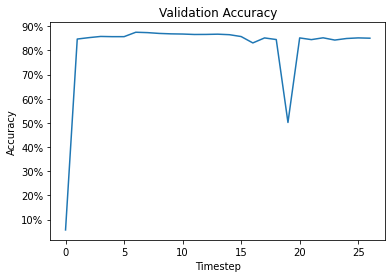

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

losses = []
f = open('./val_accuracy.txt')
line = f.readline().strip()
while(line != ''):
    losses.append(float(line))
    line = f.readline().strip()

df = pd.DataFrame(losses)
rolling = df.rolling(window=1).mean()
plt.plot(rolling)
plt.title("Validation Accuracy")

ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Timestep")

plt.show()